In [1]:
suppressMessages(library("circular"))

# plots have to be square to work with circular plots
prep_window <- function (rc = c(1, 1), w = 7, h = 7, res = options()$repr.plot.res, ...) {
    options(repr.plot.width = rc[2] * w, repr.plot.height = rc[1] * h, repr.plot.res = res)
    par(mfrow = rc, ...)
}

circ <- function(x) circular(x, template = "geographic")

# Exploratory plots

In [ ]:
# load hourly data (hourly mean & sd of wind speed & direction averaged over the Aegean region)
df <- read.csv("wind-hourly_ja_era5.csv")
df$year <- substr(df$time,1,4)
df$day <- substr(df$time,1,10)
df$hour <- (substr(df$time,12,13))

df$etesian <- (df$hour >= "13") & (df$hour <= "22") # loose classification of Etesian winds

In [14]:
# shift centre so we can plot on the line
df$dir_offset <- df$windfrom_mean
df$dir_offset <- df$dir_offset + (df$dir_offset < pi/2) * 2*pi

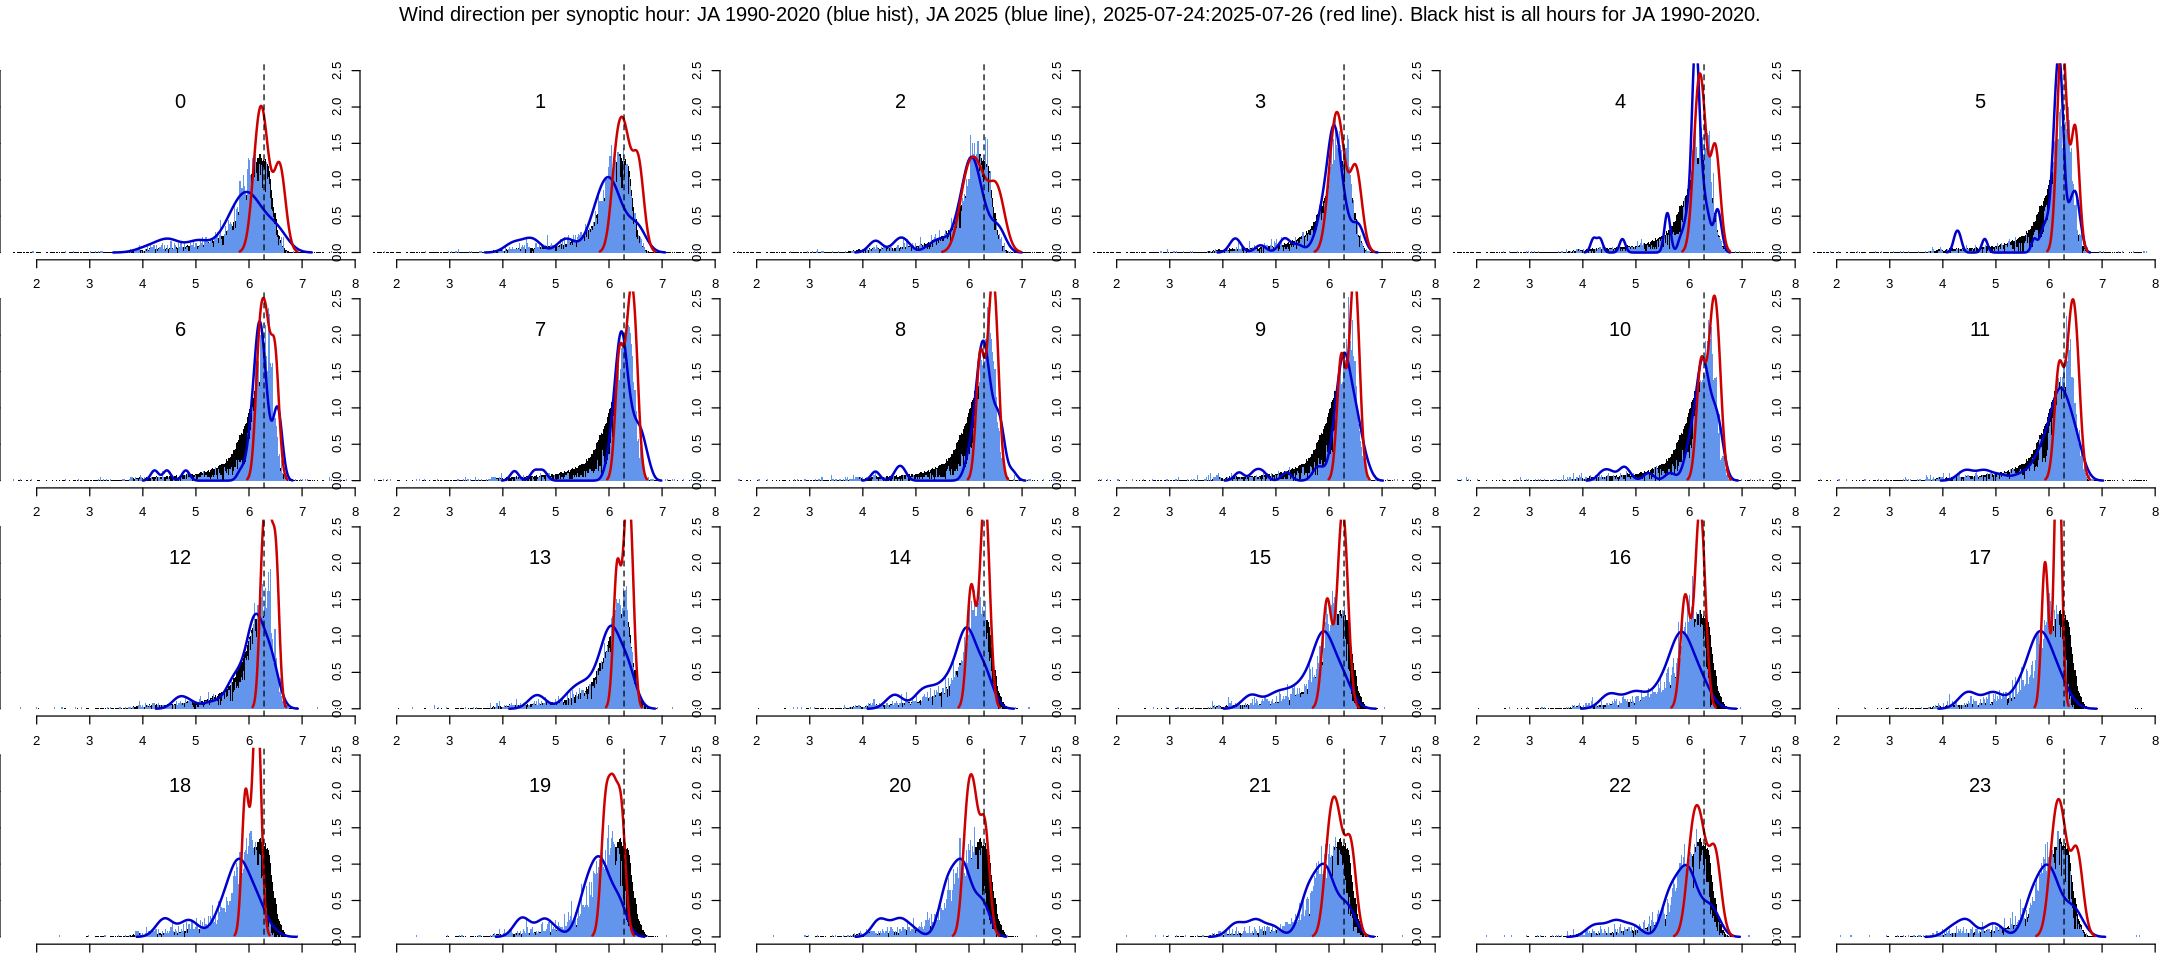

In [65]:
day1 <- "2025-07-24"; day3 <- "2025-07-26"

prep_window(c(4,6), h = 2, w = 3, mar = c(1,0,1,0), oma = c(0,0,3,0))

for (h in 1:24) {
    hist1 <- hist(df$dir_offset[(df$year >= 1990) & (df$year <= 2020)], breaks = "fd", col = "black", border = NA, prob = T, ylim = c(0,2.5), xlab = "", ylab = "", main = "")
    hist(df$dir_offset[df$lhour == h-1 & (df$year >= 1990) & (df$year <= 2020)], breaks = hist1$breaks, col = "cornflowerblue", border = NA, prob = T, add = T)
    lines(density(df$dir_offset[(df$lhour == h-1) & (df$year == 2025)]), col = "blue3", lwd = 2)
    lines(density(df$dir_offset[(df$lhour == h-1) & (df$day >= day1) & (df$day <= day3)]), col = "red3", lwd = 2)
    abline(v = 2*pi, lty = 2)
    # hist1 <- hist(df$dir_offset, breaks = "fd", col = "black", border = NA, prob = T, ylim = c(0,2), xlab = "", ylab = "", main = "")
    # hist(df$dir_offset[df$lhour == h-1], breaks = hist1$breaks, col = "cornflowerblue", border = NA, prob = T, add = T)
    mtext(side = 3, format(h-1), line = -3)
}
mtext(side = 3, outer = T, line = 1.5,
      paste0("Wind direction per synoptic hour: JA 1990-2020 (blue hist), JA 2025 (blue line), ",day1,":",day3," (red line). Black hist is all hours for JA 1990-2020."))

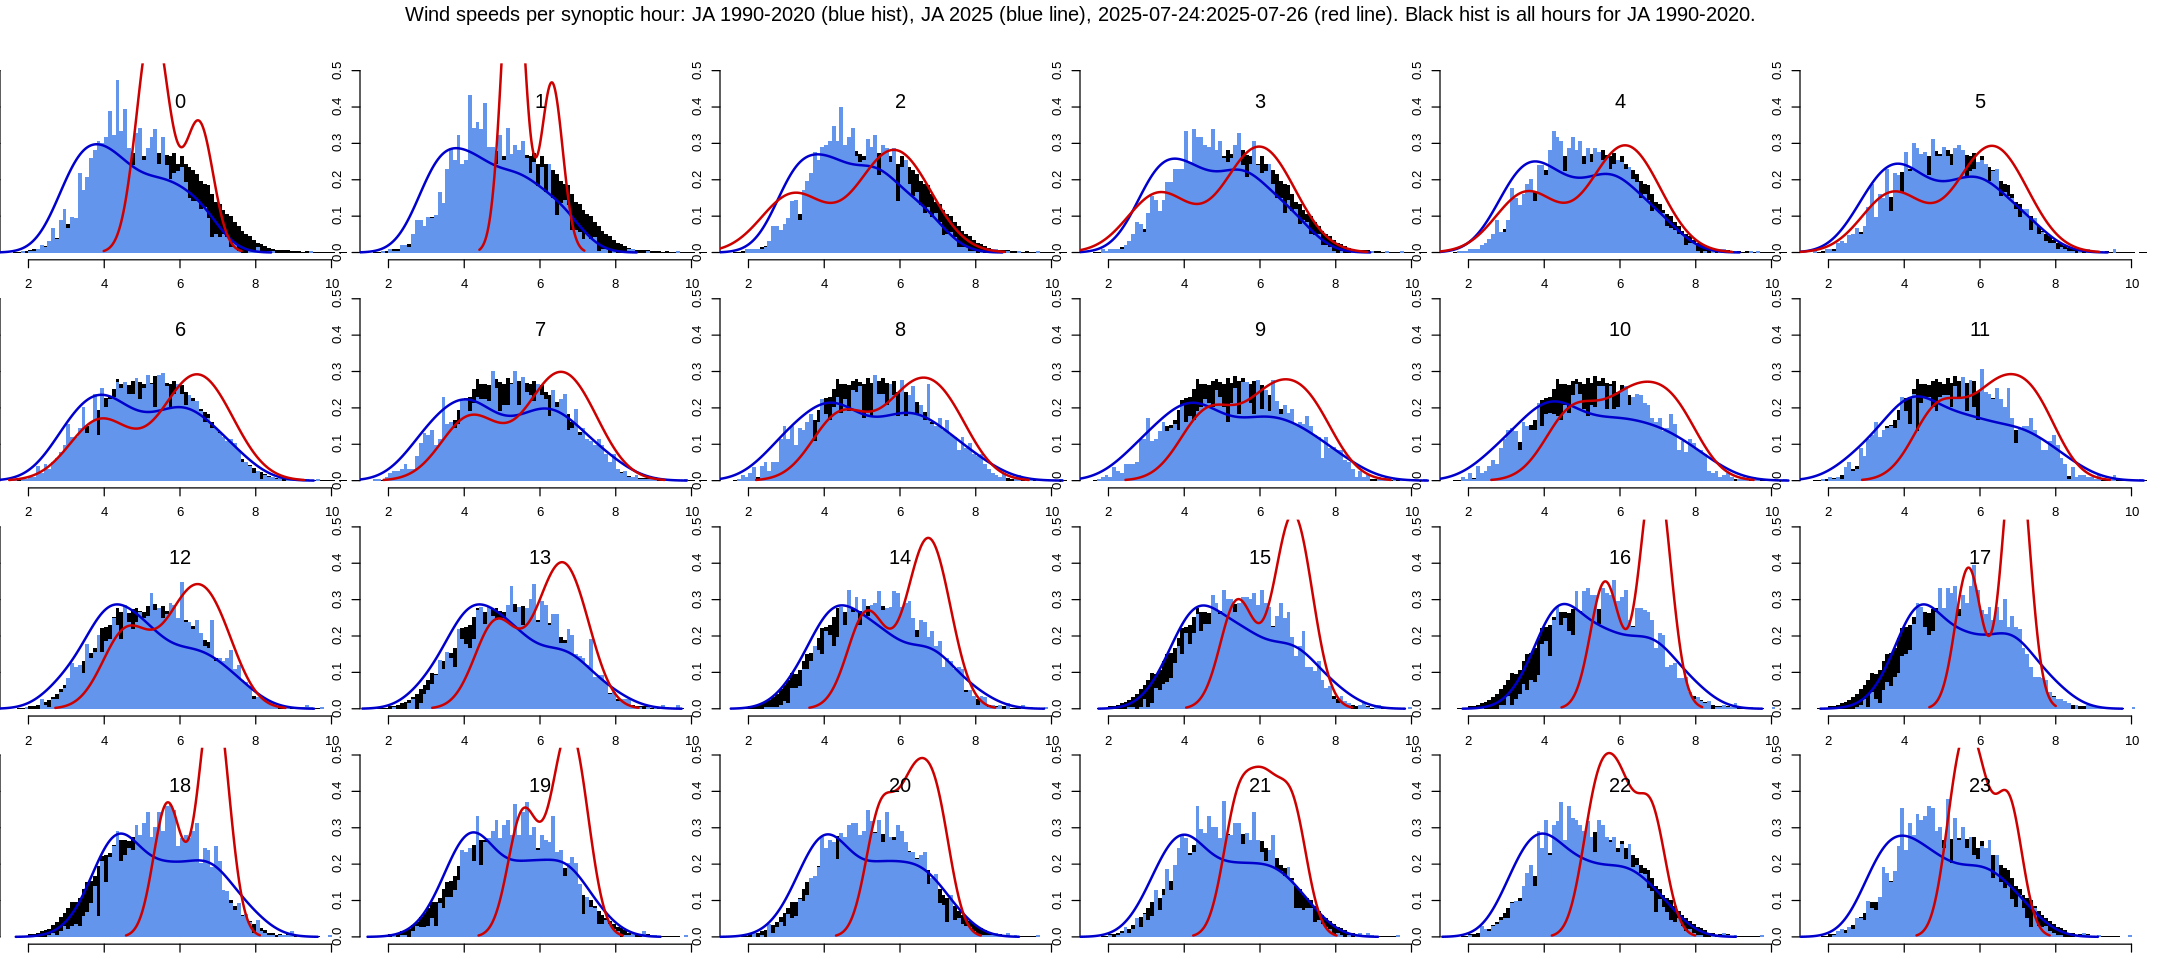

In [61]:
prep_window(c(4,6), h = 2, w = 3, mar = c(1,0,1,0), oma = c(0,0,3,0))

for (h in 1:24) {
    hist1 <- hist(df$wspd_mean[(df$year >= 1990) & (df$year <= 2020)], breaks = "fd", col = "black", border = NA, prob = T, ylim = c(0,0.5), xlab = "", ylab = "", main = "")
    hist(df$wspd_mean[df$lhour == h-1 & (df$year >= 1990) & (df$year <= 2020)], breaks = hist1$breaks, col = "cornflowerblue", border = NA, prob = T, add = T)
    lines(density(df$wspd_mean[(df$lhour == h-1) & (df$year == 2025)]), col = "blue3", lwd = 2)
    lines(density(df$wspd_mean[(df$lhour == h-1) & (df$day >= day1) & (df$day <= day3)]), col = "red3", lwd = 2)

    mtext(side = 3, format(h-1), line = -3)
}
mtext(side = 3, outer = T, line = 1.5,
      paste0("Wind speeds per synoptic hour: JA 1990-2020 (blue hist), JA 2025 (blue line), ",day1,":",day3," (red line). Black hist is all hours for JA 1990-2020."))

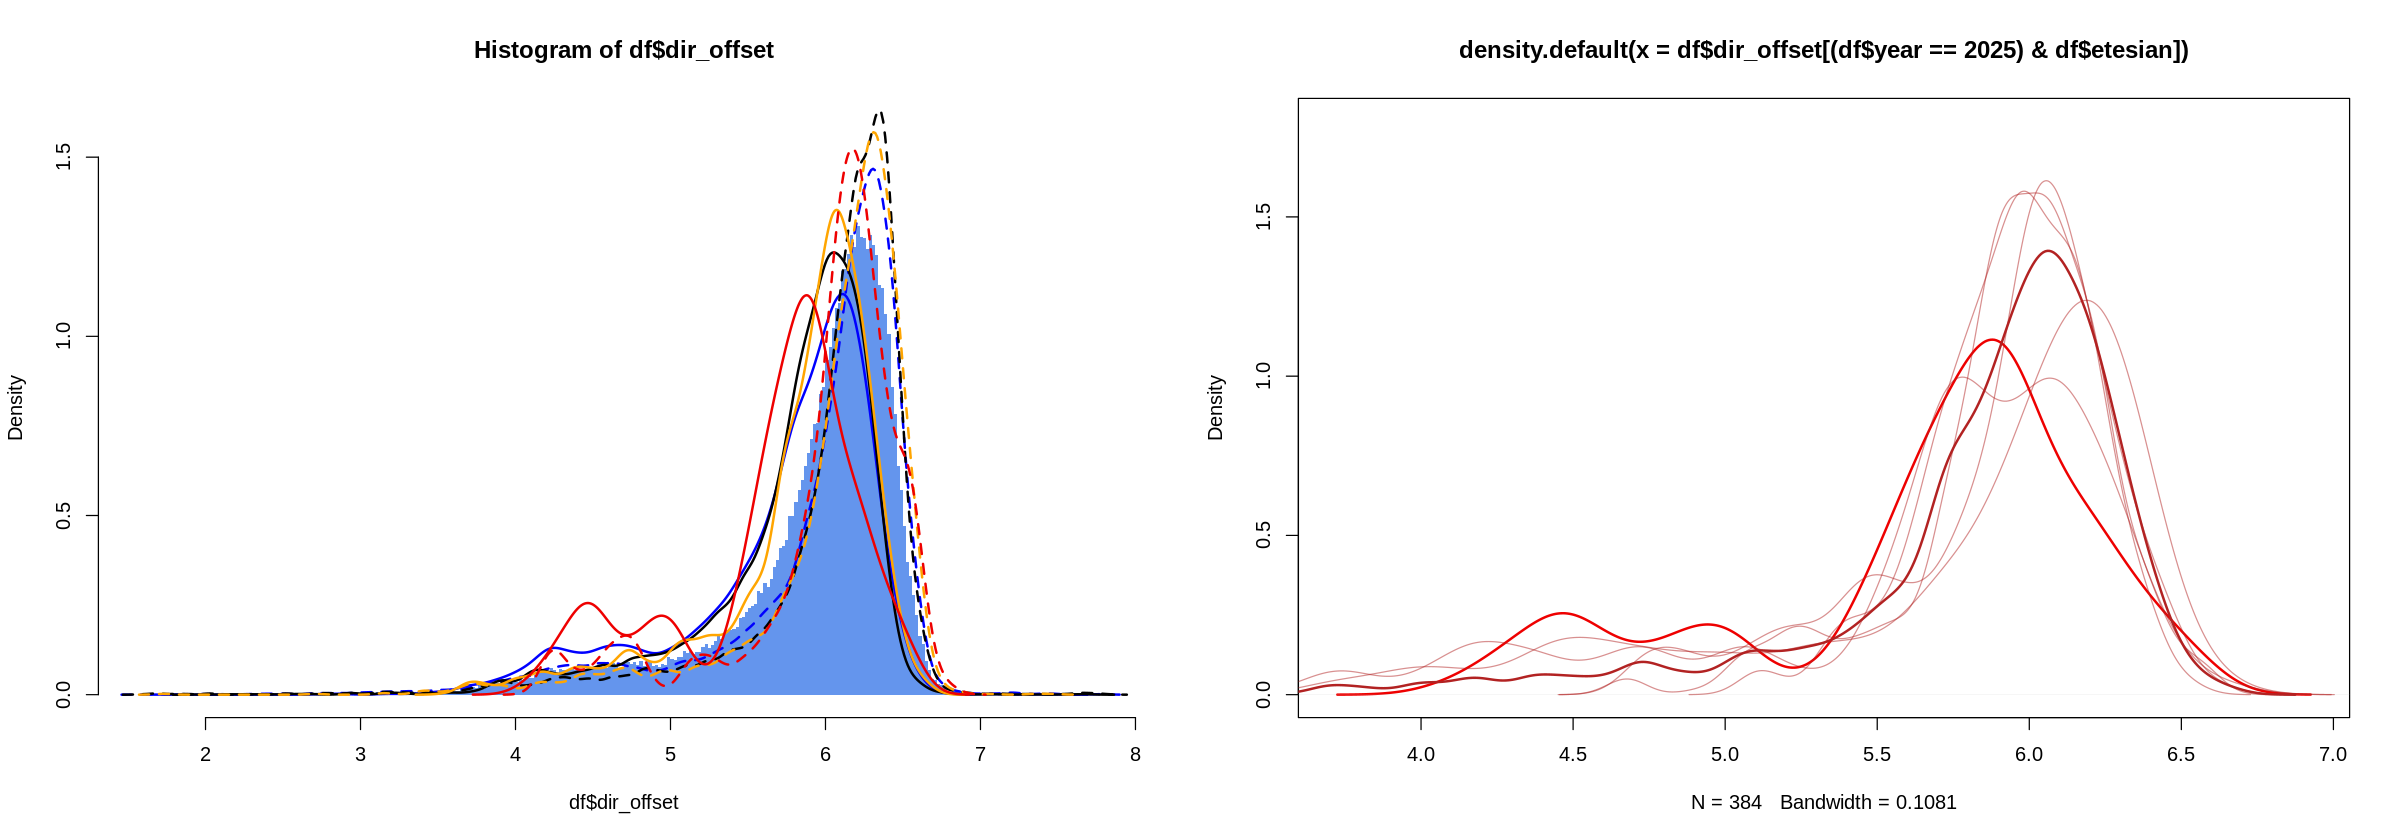

In [5]:
prep_window(c(1,2), w = 10)

hist1 <- hist(df$dir_offset, breaks = "fd", col = "cornflowerblue", border = NA, prob = T, ylim = c(0,1.6))

lines(density(df$dir_offset[(df$year >= 1950) & (df$year <= 1980) & df$etesian]), lwd = 2, col = "blue")
lines(density(df$dir_offset[(df$year >= 1950) & (df$year <= 1980) & !df$etesian]), lty = 2, lwd = 2, col = "blue")

lines(density(df$dir_offset[(df$year >= 1990) & (df$year <= 2020) & df$etesian]), lwd = 2)
lines(density(df$dir_offset[(df$year >= 1990) & (df$year <= 2020) & !df$etesian]), lty = 2, lwd = 2)

lines(density(df$dir_offset[(df$year >= 2021) & (df$year <= 2024) & df$etesian]), lwd = 2, col = "orange")
lines(density(df$dir_offset[(df$year >= 2021) & (df$year <= 2024) & !df$etesian]), lty = 2, lwd = 2, col = "orange")

lines(density(df$dir_offset[(df$year == 2025) & df$etesian]), col = "red2", lwd = 2)
lines(density(df$dir_offset[(df$year == 2025) & !df$etesian]), col = "red2", lwd = 2, lty = 2)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~##

plot(density(df$dir_offset[(df$year == 2025) & df$etesian]), col = "red2", lwd = 2, lty = 1, ylim = c(0,1.8))

invisible(sapply(2020:2024, function(y) lines(density(df$dir_offset[(df$year == y) & df$etesian]), col = adjustcolor("firebrick", 0.5), lwd = 1, lty = 1)))
# invisible(sapply(1990:2019, function(y) lines(density(df$dir_offset[(df$year == y) & df$etesian]), col = adjustcolor("gold", 0.5), lwd = 1, lty = 1)))
# invisible(sapply(1960:1989, function(y) lines(density(df$dir_offset[(df$year == y) & df$etesian]), col = adjustcolor("cornflowerblue", 0.5), lwd = 1, lty = 1)))
# invisible(sapply(1960:1989, function(y) lines(density(df$dir_offset[(df$year == y) & df$etesian]), col = adjustcolor("blue", 0.5), lwd = 1, lty = 1)))

lines(density(df$dir_offset[(df$year >= 2020) & (df$year <= 2024) & df$etesian]), lwd = 2, col = "firebrick")


In [ ]:
# create a circular object from the wind speeds
dir_2025 <- circular(df$windfrom_mean[df$year == 2025], template = "geographic")
mle_2025 <- mle.vonmises(dir_2025)

dir_clim <- circular(df$windfrom_mean[(df$year >= 1990) & (df$year <= 2020)], template = "geographic")
mle_clim <- mle.vonmises(dir_clim)

In [ ]:
# KDE suggests 2025 is pretty similar to climatological distribution
prep_window(c(1,3), h = 5, w = 5, cex.main = 2)

ylim <- c(-1,1.5); shrink <- 1; 
plot(dir_2025, axes = T, shrink = shrink, col = adjustcolor("blue2", 0.3), sep = 0.05, stack = T, main = "All measurements", ylim = ylim, xlim = ylim)
lines(density(dir_2025, bw = 25), col = "blue2")

plot(circ(df$windfrom_mean[(df$year == 2025) & df$etesian]), axes = T, shrink = shrink, col = adjustcolor("blue2", 0.3), sep = 0.05, stack = T, ylim = ylim, main = "Afternoon only")
lines(density(circ(df$windfrom_mean[(df$year == 2025) & df$etesian]), bw = 25), col = "blue2")

plot(circ(df$windfrom_mean[(df$year == 2025) & !df$etesian]), axes = T, shrink = shrink, col = adjustcolor("blue2", 0.3), sep = 0.05, stack = T, ylim = ylim, main = "Excluding afternoon")
lines(density(circ(df$windfrom_mean[(df$year == 2025) & !df$etesian]), bw = 25), col = "blue2")

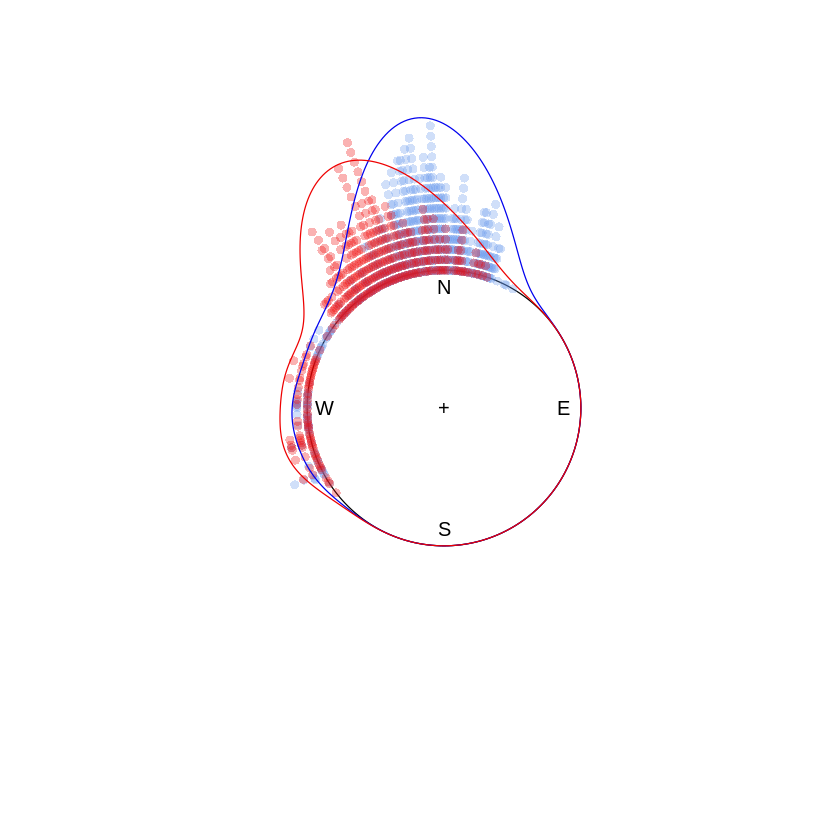

In [111]:
prep_window(c(1,1), oma = c(0,0,0,0), cex.main = 2)

plot(circ(df$windfrom_mean[(df$year == 2025) & !df$etesian]), axes = T, shrink = 2, col = adjustcolor("cornflowerblue", 0.3), sep = 0.075, stack = T)
points(circ(df$windfrom_mean[(df$year == 2025) & df$etesian]), col = adjustcolor("red2", 0.3), sep = 0.075, stack = T)
lines(density(circ(df$windfrom_mean[(df$year == 2025) & !df$etesian]), bw = 25), col = "blue2")
lines(density(circ(df$windfrom_mean[(df$year == 2025) & df$etesian]), bw = 25), col = "red2")

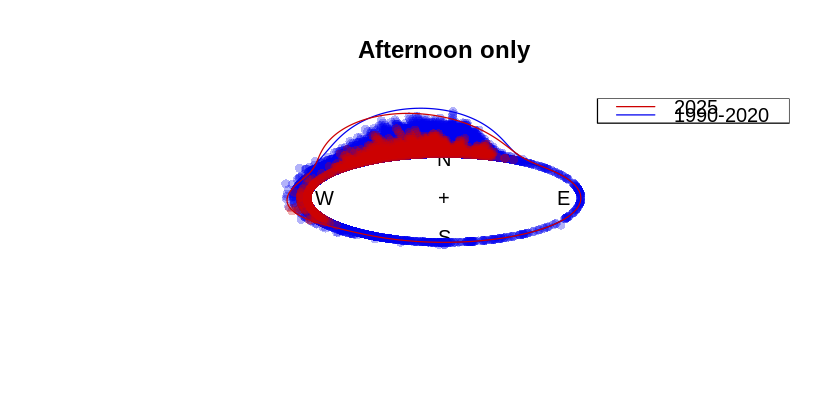

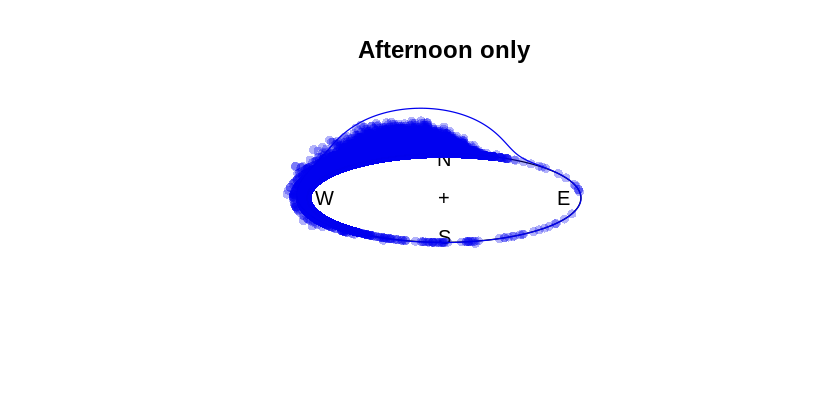

In [18]:
plot(dir_clim, axes = T, shrink = 2, col = adjustcolor("blue2", 0.3), stack = T, sep = 0.05, main = "Afternoon only")
lines(density(dir_clim, bw = 25), col = "blue2")

points(dir_2025, shrink = 2, col = adjustcolor("red3", 0.3), stack = T, sep = 0.05)
lines(density(dir_2025, bw = 25), col = "red3")

legend("topright", c("2025", "1990-2020"), col = c("red3", "blue2"), lty = 1)

plot(circ(df$windfrom_mean[(df$year >= 1990) & (df$year <= 2020) & (df$etesian)]), axes = T, shrink = 2, col = adjustcolor("blue2", 0.3), stack = T, sep = 0.05, main = "Afternoon only")
lines(density(dir_clim, bw = 25), col = "blue2")

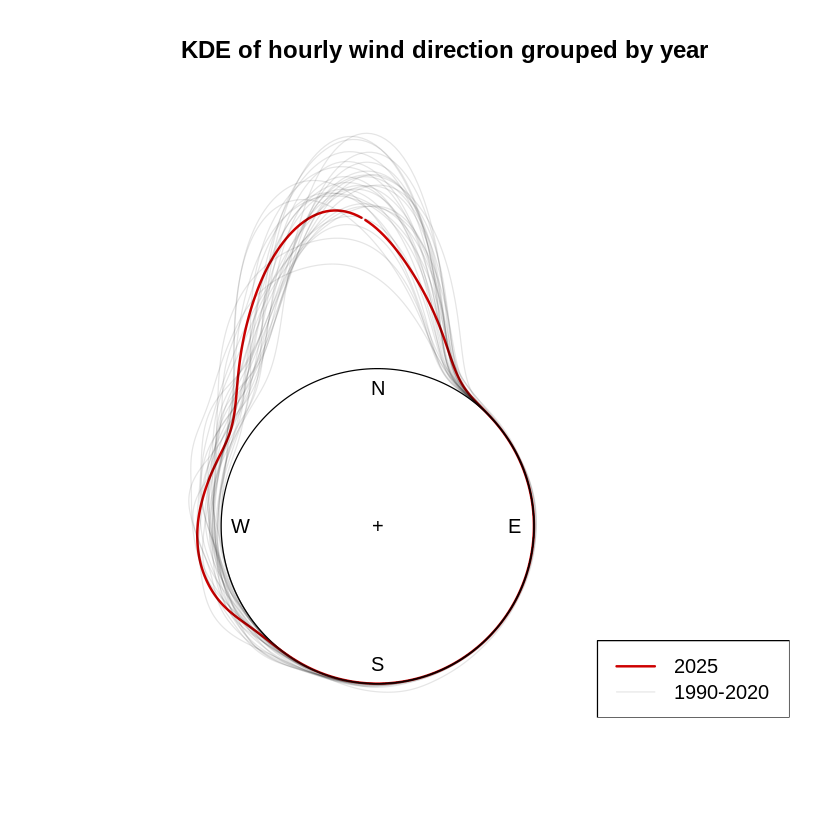

In [22]:
# what about indvidual years? How unusual is 2025?
bw <- 50
plot(density(dir_2025, bw = bw), col = "red3", ylim = c(-1,2.5), xlim = c(0.3,0.55), lw = 2,
    main = "KDE of hourly wind direction grouped by year", xlab = "", ylab = "")

for (y in 1990:2020) {
    lines(density(circular(df$windfrom_mean[df$year == y], template = "geographic"), bw = bw), col = adjustcolor("black", 0.1))
}

legend("bottomright", c("2025", "1990-2020"), col = c("red3", adjustcolor("black", 0.1)), lty = 1, lwd = c(2,1))

## Get peak & central interval of density estimate

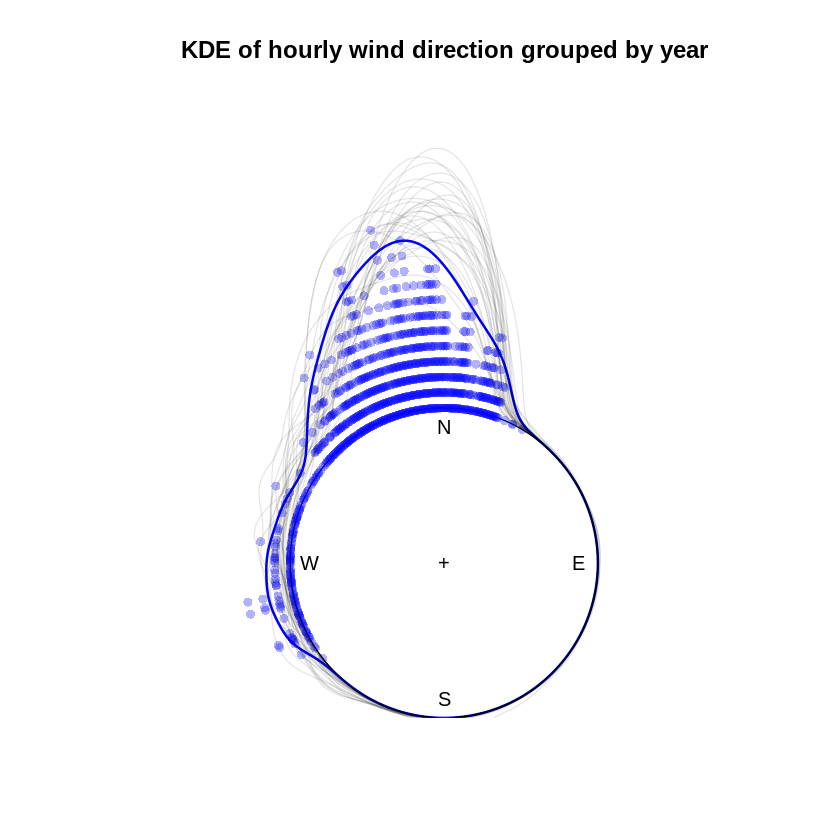

In [7]:
bw <- 100

plot(dir_2025, axes = T, shrink = 2, col = adjustcolor("blue", 0.3), stack = T, sep = 0.1,
    main = "KDE of hourly wind direction grouped by year", xlab = "", ylab = "", ylim = c(0,1))

lines(density(dir_2025, bw = bw), col = "blue", lw = 2)

for (y in 1990:2020) {
    lines(density(circular(df$windfrom_mean[df$year == y], template = "geographic"), bw = bw), col = adjustcolor("black", 0.1))
}

In [8]:
df$deg <- round(df$deg)

ERROR: Error in round(df$deg): non-numeric argument to mathematical function


In [ ]:
deg_2025 <- circular(df$deg[df$year == 2025], template = "geographic", units = "degrees")

plot(deg_2025, axes = T, shrink = 2, col = adjustcolor("red3", 0.3), stack = T, sep = 0.05,
    main = "KDE of hourly wind direction grouped by year", xlab = "", ylab = "", ylim = c(0,1))

lines(density(deg_2025, bw = bw), col = "red3", lw = 2)

for (y in 1990:2020) {
    lines(density(circular(df$deg[df$year == y], template = "geographic", units = "deg"), bw = bw), col = adjustcolor("blue2", 0.1))
}

# for (y in 1950:1980) {
#     lines(density(circular(df$deg[df$year == y], template = "geographic", units = "deg"), bw = bw), col = adjustcolor("black", 0.1))
# }

legend("topright", c("2025", "1990-2020"), col = c("red3", "blue2"), lty = 1)

## Width of central interval

In [ ]:
res <- data.frame(t(sapply(1940:2025, function(y) {
    dns <- density(circular(df$windfrom_mean[df$year == y], template = "geographic"), bw = bw)
    top52 <- circular(dns$x[order(dns$y, decreasing = T)][1:52], template = "geographic") # approx top 10% bounds
    setNames(c(top52[1], top52[order(top52 + pi)][c(1,52)]), c("mode", "lower", "upper"))
})))
rownames(res) <- 1940:2025

In [ ]:
res_adj <- res + pi

In [ ]:
rwwa::prep_window(w = 8)

ylim <- c(3*pi/4,5*pi/4)
yticks <- data.frame(ticks = seq(0,2*pi, pi/4), labels = c("-pi","-3pi/4","-pi/2","-pi/4","2pi","pi/4","pi/2","3pi/4","pi"))
yticks <- yticks[(yticks$ticks > ylim[1]) & (yticks$ticks < ylim[2]),]

plot(rownames(res_adj), res_adj[,"mode"], pch = 20, ylim = ylim, yaxt = "n")
segments(x0 = as.integer(rownames(res_adj)), y0 = res_adj[,"lower"], y1 = res_adj[,"upper"], lwd = 3, col = adjustcolor("cornflowerblue", 0.7))
points(rownames(res_adj), res_adj[,"mode"], pch = 20)

grid(lty = 1, col = adjustcolor("black", 0.1))
axis(2, at = yticks$ticks, labels = yticks$labels)
abline(h = pi, lty = 3)

# Model fitting

## Functions from AS.circ

In [2]:
EM.vonmises <- function(x, k, max.runs = 1000, conv = 0.00001) {
    
    x <- circular(x)
    # provide starting values for mu, kappa, alpha
    mu <- circular(runif(k, 0, max(x)))
    kappa <- runif(k,0,1)
    alpha <- runif(k,0,1)
    alpha <- alpha/sum(alpha) # normalise to sum to 1
    
    # Support function - calculate log-likelihood
    
    log.likelihood <- function(x, mu, kappa, alpha, k) {
        l <- matrix(nrow = k, ncol = length(x))
        for (i in 1:k) {
            l[i,] <- alpha[i] * dvonmises(x, mu[i], kappa[i])
        }
        sum(log(colSums(l)))
    }
    
    log.lh <- log.likelihood(x, mu, kappa, alpha, k)
    new.log.lh <- abs(log.lh) + 100
    n = 0
    
    # create array to store initial values
    first.10 <- c(iter = n, mu = mu, kappa = kappa, alpha = alpha,
                  log.lh = log.lh)
    
    while ((abs(log.lh - new.log.lh) > conv) && (n < max.runs)) {
        
        # Estimation - calculate z_ij
        z <- matrix(0, ncol = length(x), nrow = k)
        for (i in 1:k){
            z[i,] <- alpha[i] * dvonmises(x, mu[i], kappa[i])
        }
        all.z <- colSums(z)
        for (i in 1:k){
            z[i,] <- z[i,] / all.z
        }
        
        # Maximisation - update parameters
        for (i in 1:k) {
            alpha[i] <- sum(z[i,]) / length (x)
            mu[i] <- atan2(sum(z[i,] * sin(x)), sum(z[i,] * cos(x)))
            kappa[i] <- A1inv(sum(z[i,] * (cos(x - mu[i]))) / sum(z[i,]))
            
            # correct for negative kappa if necessary
            if (kappa[i] < 0) {
                kappa[i] <- abs(kappa[i])
                mu[i] <- mu[i] + pi
            }
        }
        
        # calculate log-likelihoods for comparison
        log.lh <- new.log.lh
        new.log.lh <- log.likelihood(x, mu, kappa, alpha, k)
        n <- n + 1
        
        # save first 10 iterations
        if (n < 11) {
            next.iter <- c(iter = n, mu = mu, kappa = kappa, alpha = alpha,
                           log.lh = new.log.lh)
            first.10 <- rbind(first.10, next.iter)
        }
    }
    
    # Output: if model hasn't converged, show error message
    #         if it has, output the parameters & first 10 iterations
    if ((abs(log.lh - new.log.lh) > conv)) {
        cat ("Data hasn't converged after", n, "iterations; \n",
             "Difference in log-likelihoods is", 
             round(abs(log.lh - new.log.lh),6))
    } else {
        row.names(first.10) <- first.10[,1]
        list(k = k, mu = mu %% (2*pi), kappa = kappa, alpha = alpha,
             log.lh = new.log.lh)
    }
}

JP.mle <- function(data) {
    n <- length(data)
    s <- sum(sin(data))
    c <- sum(cos(data))
    
    # starting values: von Mises ML estimates
    muvM <- atan2(s,c) %% (2*pi)
    kapvM <- A1inv(sqrt(s*s+c*c)/n)
    
    # specify Jones-Pewsey log-likelihood function to optimize
    JPnll <- function(p){
        mu <- p[1] ; kappa <- p[2] ; psi <- p[3] ; parlim <- abs(kappa*psi)
        if (parlim > 10) {
            y <- 9999.0
            return(y)
        } else {
            ncon <- JP.NCon(kappa, psi)
            y <- -sum(log(JP.pdf(data, mu, kappa, psi, ncon)))
            return (y)
        }
    }
    
    # optimize the specified function - try-catch added to capture optimization errors
    out <- tryCatch({
        optim(par=c(muvM, kapvM, 0.001), fn=JPnll, gr = NULL, method = "L-BFGS-B",
              lower = c(muvM-pi, 0, -Inf), upper = c(muvM+pi, Inf, Inf), hessian = TRUE)
    }, 
    error=function(err) {list(value = NA, par = rep(NA, 3), HessMat = NA)} )
    
    list(maxll = -out$value,
         mu = out$par[1] %% (2*pi),
         kappa = out$par[2],
         psi = out$par[3],
         HessMat = out$hessian)
}


JP.NCon <- function(kappa, psi){
    if (kappa < 0.001) {ncon <- 1/(2*pi) ; return(ncon)} 
    else {
        eps <- 10*.Machine$double.eps
        if (abs(psi) <= eps) {ncon <- 1/(2*pi*I.0(kappa)) ; return(ncon)}
        
        
        else {
            intgrnd <- function(x){ (cosh(kappa*psi)+sinh(kappa*psi)*cos(x))**(1/psi) }
            
            ncon <- 1/integrate(intgrnd, lower=-pi, upper=pi)$value
            return(ncon) } }
}

JP.pdf <- function(theta, mu, kappa, psi, ncon){
    
    if (kappa < 0.001) {pdfval <- 1/(2*pi) ; return(pdfval)}
    else {
        eps <- 10*.Machine$double.eps
        if (abs(psi) <= eps) {
            pdfval <- ncon*exp(kappa*cos(theta-mu)) ; return(pdfval) }
        
        
        else { 
            pdfval <- (cosh(kappa*psi)+sinh(kappa*psi)*cos(theta-mu))**(1/psi)
            pdfval <- ncon*pdfval ; return(pdfval) } }
    
}

## Von Mises

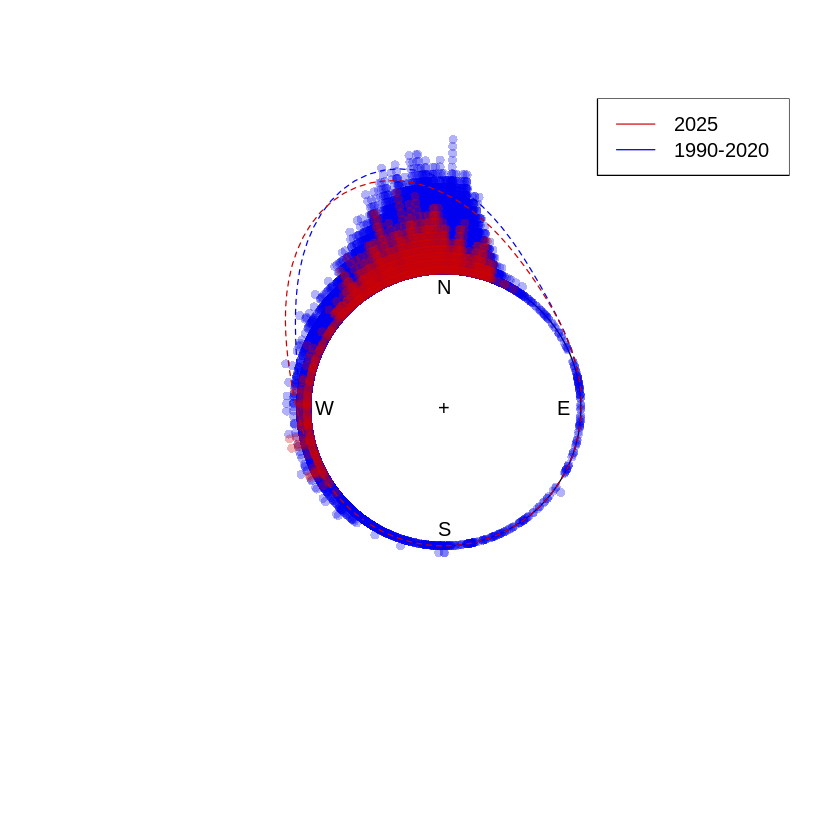

In [8]:
# single Von Mises doesn't capture shape well - needs a mixure really
plot(dir_clim, axes = T, shrink = 2, col = adjustcolor("blue2", 0.3), stack = T, sep = 0.05)
curve.circular(dvonmises(x, mu = mle_clim$mu, kappa = mle_clim$kappa), from = 0, to = 2*pi, add = T, col = "blue2", lty = 2)

points(dir_2025, shrink = 2, col = adjustcolor("red3", 0.3), stack = T, sep = 0.05)
curve.circular(dvonmises(x, mu = mle_2025$mu, kappa = mle_2025$kappa), from = 0, to = 2*pi, add = T, col = "red3", lty = 2)

legend("topright", c("2025", "1990-2020"), col = c("red3", "blue2"), lty = 1)

In [9]:
# unwrapping the data suggests two distinct clusters but third cluster gives better fit to peak
nclust = 3
set.seed(42)
mixt_2025 <- EM.vonmises(dir_2025, nclust)

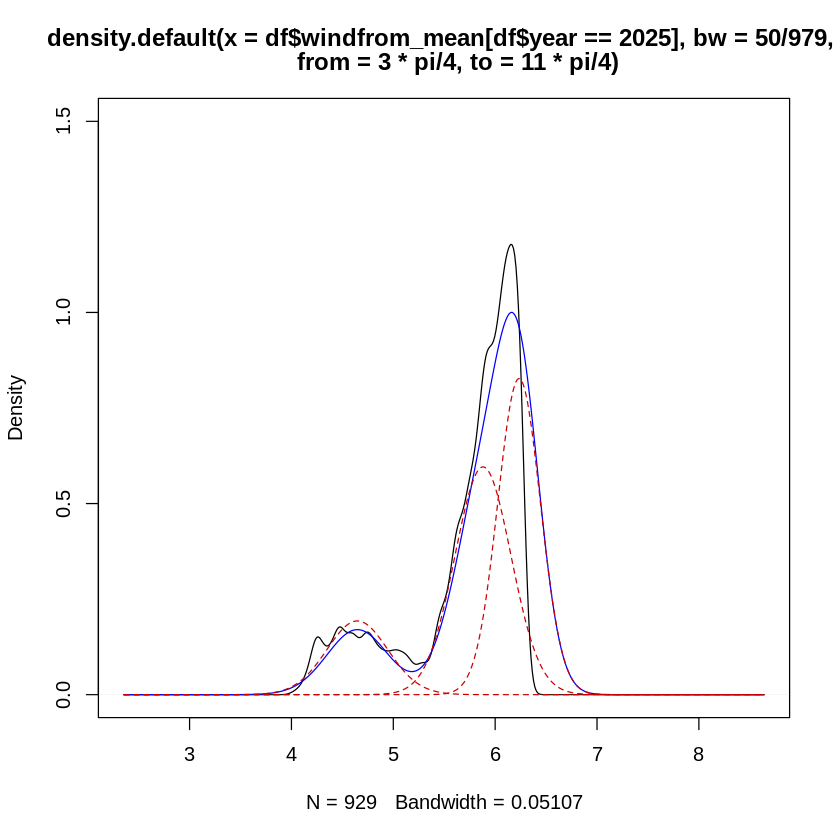

In [10]:
plot(density(df$windfrom_mean[df$year == 2025], from = 3*pi/4, to = 11*pi/4, bw = 50/979), ylim = c(0,1.5))
# lines(density(df$windfrom_mean[df$year == 2025], from = 3*pi/4, to = 11*pi/4))
# hist(((df$windfrom_mean[df$year == 2025] + 3*pi/2) %% 2*pi) + pi, breaks = "fd", add = T, prob = T, col = adjustcolor("lightblue", 0.5), border = NA)

x <- seq(3*pi/4, 11*pi/4, length.out = 512)

mixt_dns <- sapply(1:nclust, function(i) {
    suppressWarnings(dvonmises(x, mu = mixt_2025$mu[i], kappa = mixt_2025$kappa[i]) * mixt_2025$alpha[i])
})

lines(x, rowSums(mixt_dns) / max(rowSums(mixt_dns)), col = "blue")
matplot(x, mixt_dns, col = "red3", type = "l", add = T, lty = 2)

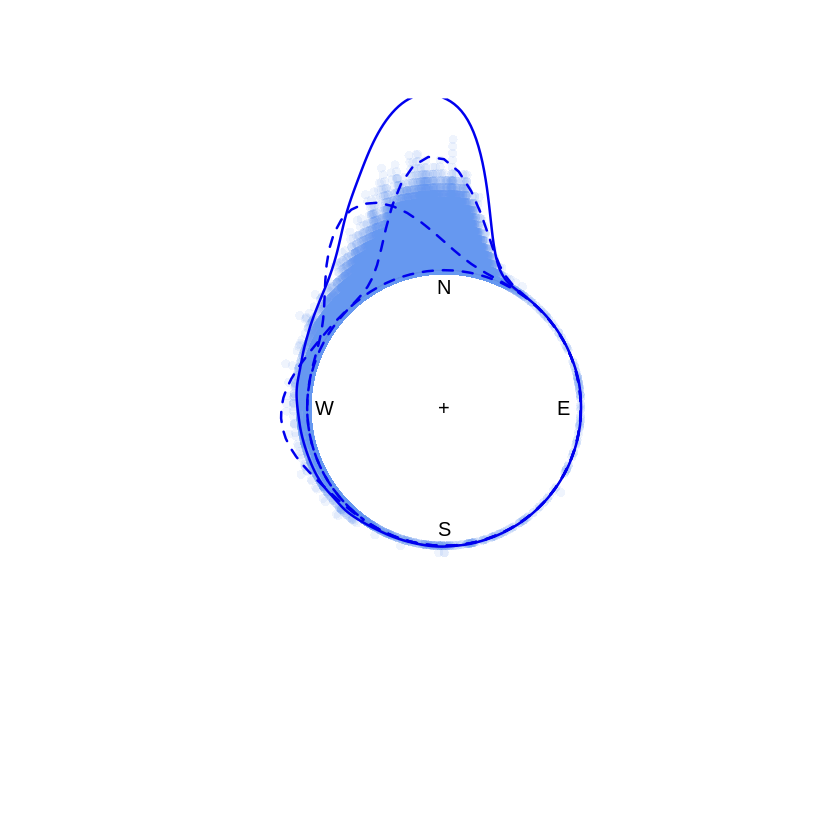

In [11]:
# single Von Mises doesn't capture shape well - needs a mixure really, and even then still not great
plot(dir_clim, axes = T, shrink = 2, col = adjustcolor("cornflowerblue", 0.1), stack = T, sep = 0.05)

for (i in 1:nclust) {
    curve.circular(dvonmises(x, mu = circular(mixt_2025$mu[i], template = "geographic"), kappa = mixt_2025$kappa[i])*mixt_2025$alpha[i],
               from = 0, to = 2*pi, add = T, col = "blue2", lty = 2, lwd = 2)
}

lines(density(dir_clim, bw = 240), col = "blue2", lwd = 2)

In [12]:
density(dir_clim, bw = 240)


Call:
	density.circular(x = dir_clim, bw = 240)

Data: dir_clim (46128 obs.);	Bandwidth 'bw' = 240

       x                    y            
 n      :512.000000   Min.   :0.0007537  
 Min.   :  4.706241   1st Qu.:0.0019274  
 1st Qu.:  3.135445   Median :0.0107193  
 Median :  1.570796   Mean   :0.1588467  
 Mean   :  1.570796   3rd Qu.:0.1039099  
 3rd Qu.:  0.006148   Max.   :1.2792708  
 Max.   : -1.564648                      
 Rho    :  0.001953                      

## Jones-Pewsey

In [13]:
# Jones-Pewsey? Still not skewed enough
jp_pars <- JP.mle(dir_2025)

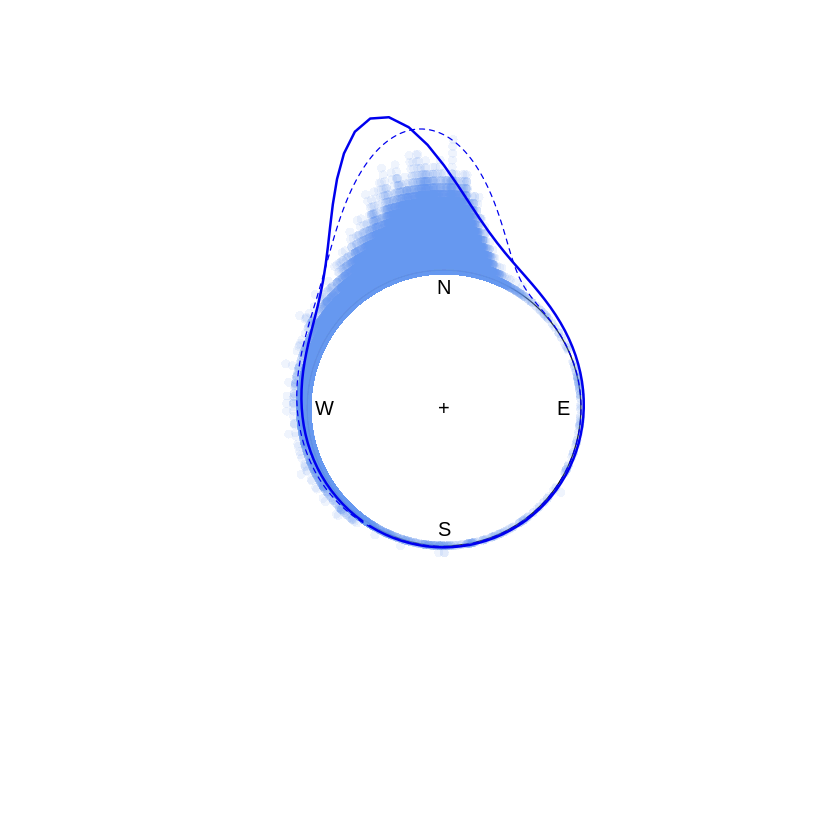

In [14]:
plot(dir_clim, axes = T, shrink = 2, col = adjustcolor("cornflowerblue", 0.1), stack = T, sep = 0.05)

curve.circular(djonespewsey(x, mu = circular(jp_pars$mu, template = "geographic"), kappa = jp_pars$kappa, psi = jp_pars$psi),
               from = 0, to = 2*pi, add = T, col = "blue2", lty = 1, lwd = 2)
lines(density(dir_clim, bw = 25), col = "blue2", lwd = 1, lty = 2)

# Is synoptic hour important?

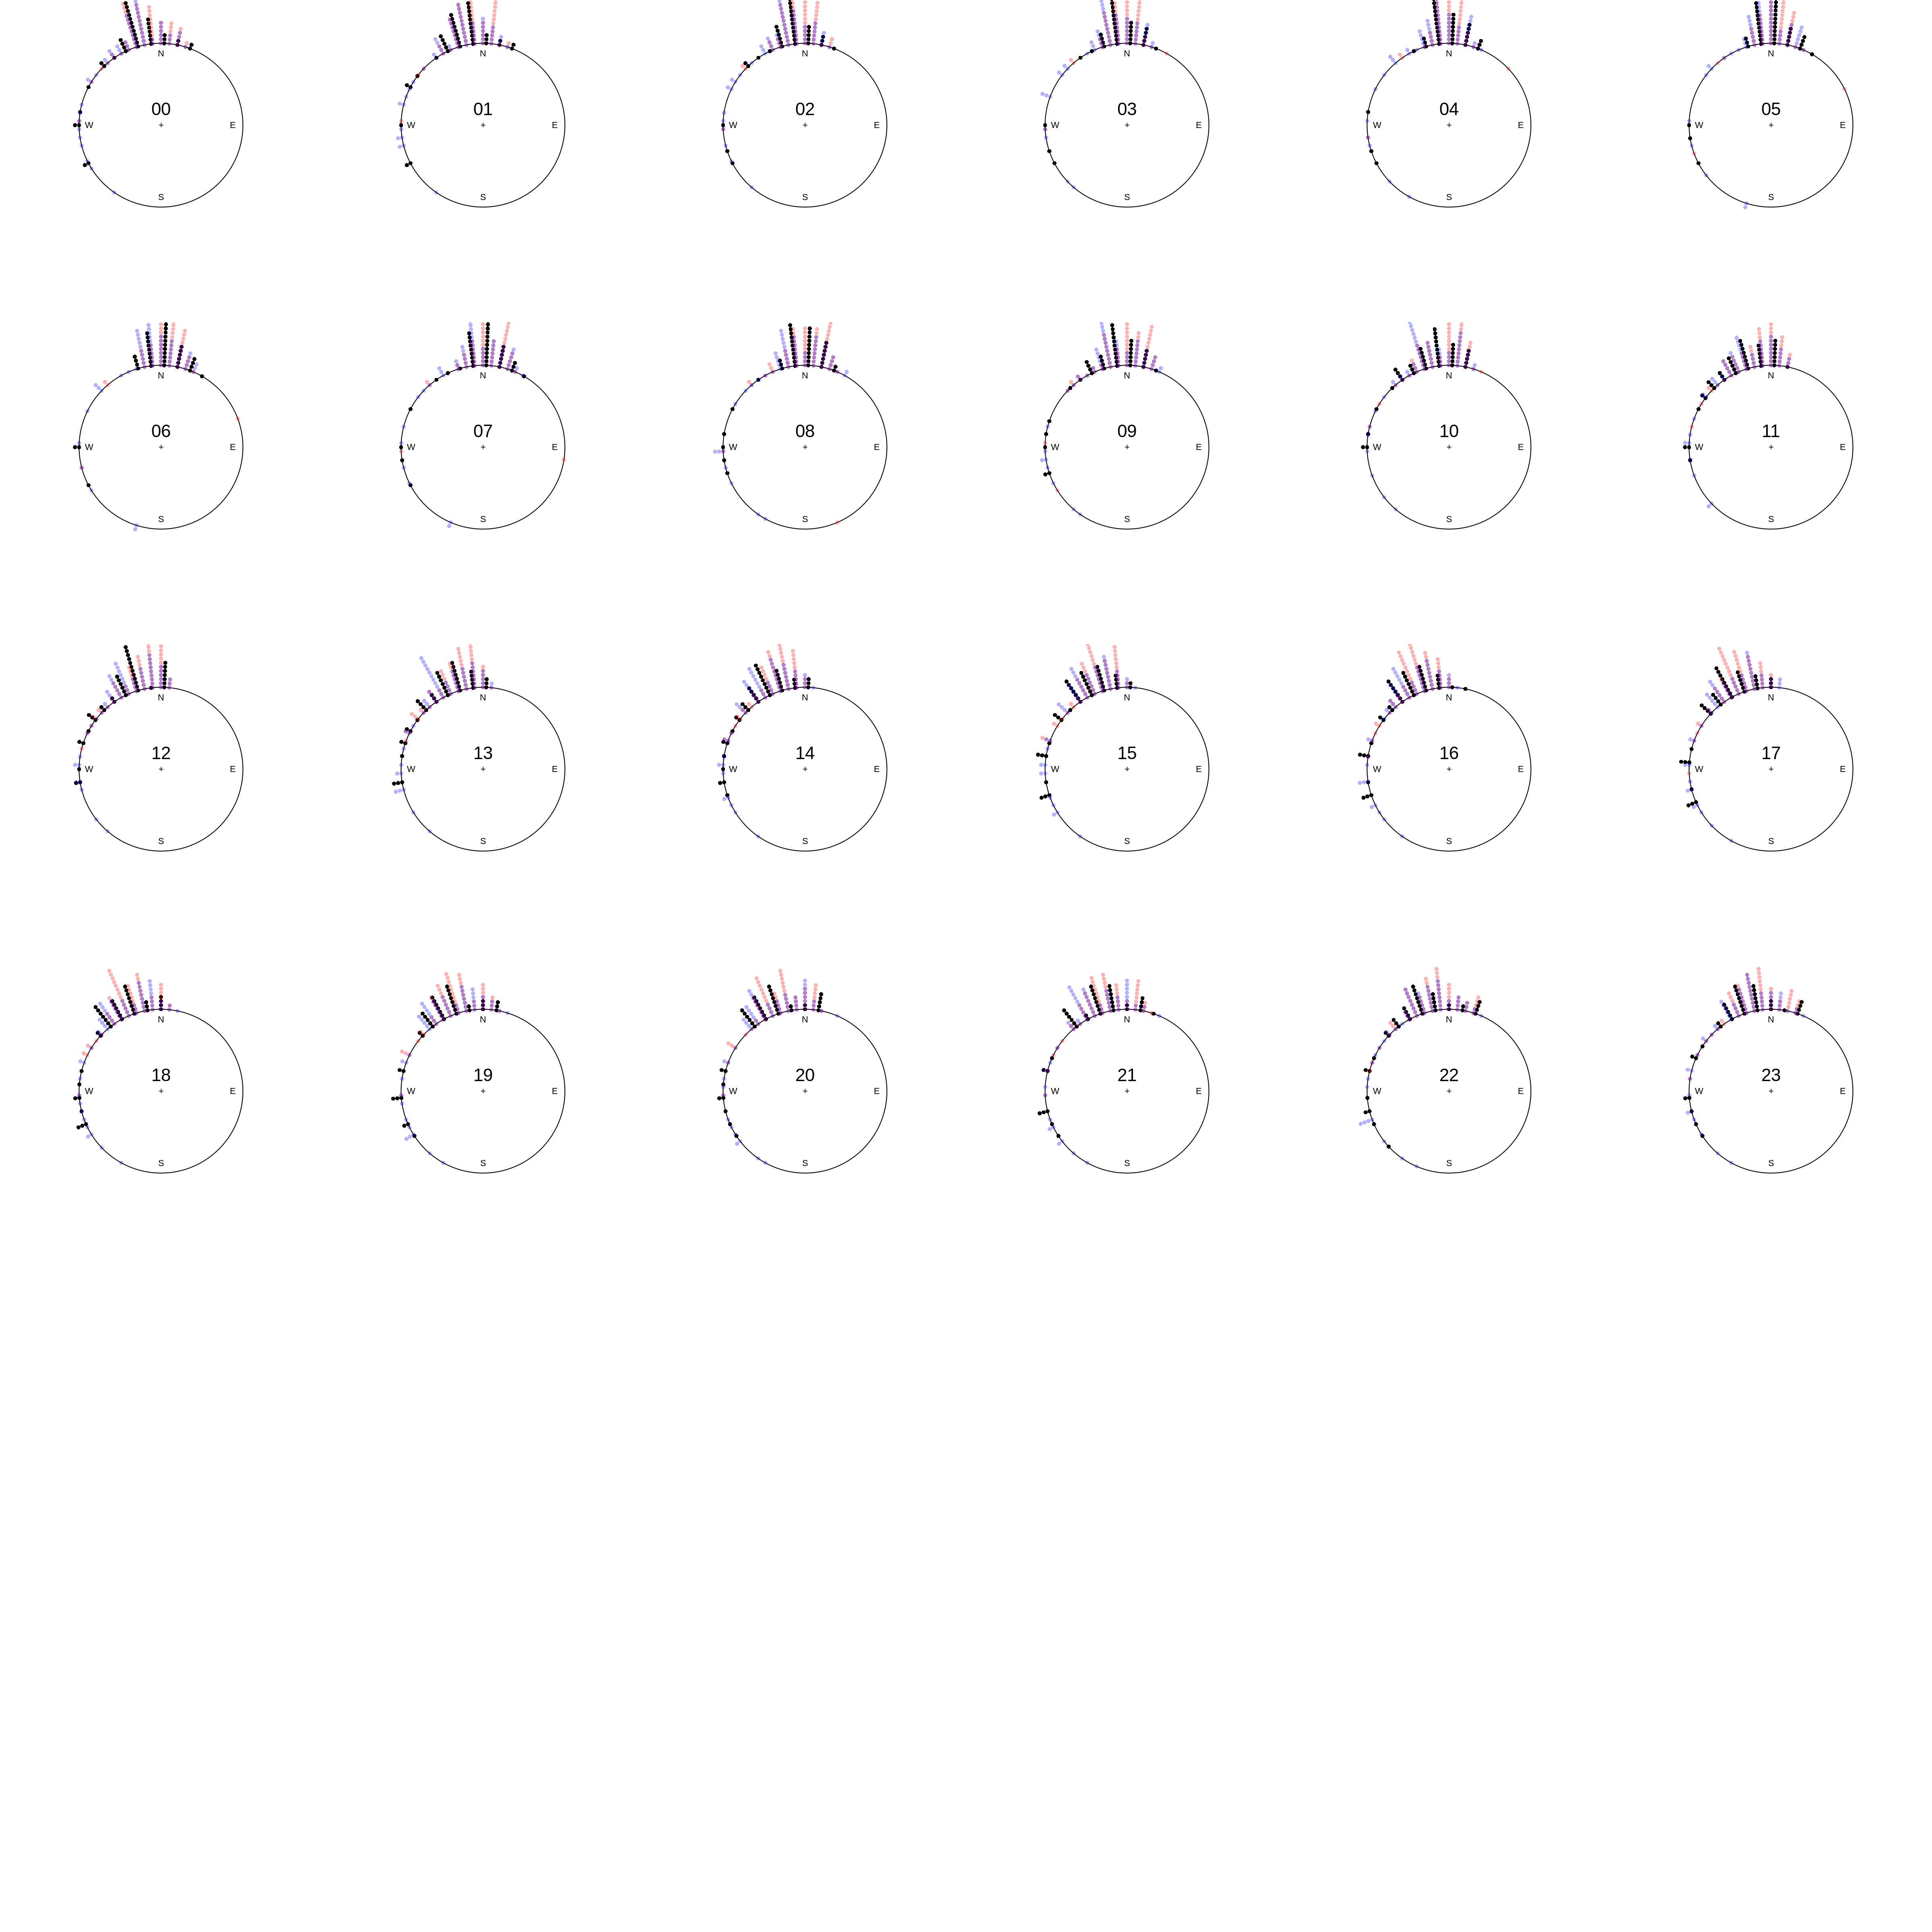

In [20]:
rwwa::prep_window(c(6,6), mar = c(0,0,0,0))


for (i in unique(df$hour)) {
    x_2025 <- circular(df[(df$year == 2025) & (df$hour == i), "windfrom_mean"], template = "geographic", units = "radian")
    x_2024 <- circular(df[(df$year == 2024) & (df$hour == i), "windfrom_mean"], template = "geographic", units = "radian")
    x_2023 <- circular(df[(df$year == 2023) & (df$hour == i), "windfrom_mean"], template = "geographic", units = "radian")
    plot(x_2025, axes = T, shrink = 1.75, col = "black", stack = T, sep = 0.05, main = "", xlab = "", ylab = "", ylim = c(-1,0.5))
    points(x_2024, col = adjustcolor("red", 0.3), stack = T, sep = 0.05)
    points(x_2023, col = adjustcolor("blue", 0.3), stack = T, sep = 0.05)
    text(0,0.2,labels = i, cex = 2)
}